The purpose of this was to build a wordcloud with the limitations of my computer as my first 2 attempts were beyond the reach of my 2018 Powerbook. This a trivial exercise, but a first exposure to the idea for me. Using Alice’s Adventures in Wonderland with the chosen stopwords was nonsensical but I was just trying to get this to work. 

In [1]:
# if wordcloud & textblob need to be installed in your Juypter environment
#!pip install wordcloud textblob

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import requests

In [3]:
# Load the dataset - 'Romeo and Juliet'
url = "https://www.gutenberg.org/cache/epub/1513/pg1513.txt"
response = requests.get(url)
data = response.text

# Convert the text into a DataFrame, assuming each line is a row
data = data.split('\n')
df = pd.DataFrame(data, columns=["Text"])

# Limit the dataset for testing purposes, in this case 500 lines
df = df.sample(n=500, random_state=42)

# Display the dataframe
print(df.head())

                                            Text
4997                                          \r
4352                                    NURSE.\r
3080  Where is my father and my mother, Nurse?\r
2835                             LADY CAPULET.\r
1197       ’Tis since the nuptial of Lucentio,\r


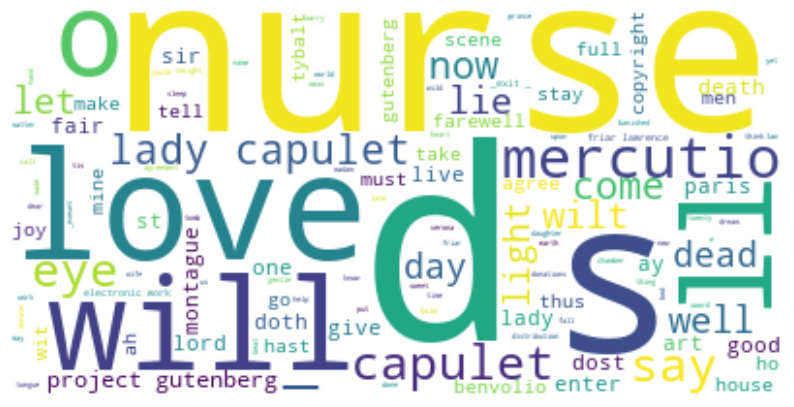

In [4]:
# Preprocessing
df["Text"] = df["Text"].str.lower()

# Sentiment analysis using TextBlob
df["sentiment"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define sentiment labels based on sentiment score
df["sentiment_label"] = np.where(df["sentiment"] > 0, "positive", "negative")

# Combine all text into a single string
all_text = " ".join(text for text in df["Text"])

# Define and update stopwords unique to the play - I had help with this from ChatGPT4o
stopwords = set(STOPWORDS)
stopwords.update(["romeo", "juliet", "thee", "thou", "thy"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As a proof of concept this was successfull - I am certain tat loading the entire play might provide a different Wordcloud (see below).

In [5]:
# Load the dataset - 'Romeo and Juliet'
url = "https://www.gutenberg.org/cache/epub/1513/pg1513.txt"
response = requests.get(url)
data = response.text

# Convert the text into a DataFrame, assuming each line is a row
data = data.split('\n')
df = pd.DataFrame(data, columns=["Text"])

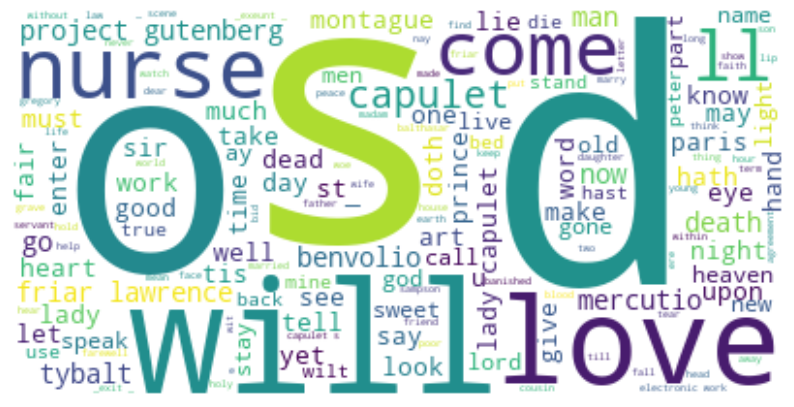

In [6]:
# Preprocessing
df["Text"] = df["Text"].str.lower()

# Sentiment analysis using TextBlob
df["sentiment"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define sentiment labels based on sentiment score
df["sentiment_label"] = np.where(df["sentiment"] > 0, "positive", "negative")

# Combine all text into a single string
all_text = " ".join(text for text in df["Text"])

# Define and update stopwords unique to the play - I had help with this from ChatGPT4o
stopwords = set(STOPWORDS)
stopwords.update(["romeo", "juliet", "thee", "thou", "thy"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This was surprising I would have thought 'love' would be number 1 with a bullet.